# Pequeño café en Los Angeles

En esta investigación se realizará un análisis a un dataset de restaurantes de LA, para preparar un estudio de mercado, y demostrar que será capaz de continuar con el éxito, aún así los camareros robots desaparezcan, y así atraer a los inversionistas.


Por este motivo, se buscará lo siguiente:


1. Abrir el archivo de datos y analizar la información general.
2. Preprocesar los datos.
3. Analizar los datos.
4. Preparar una presentación.
5. Escribir una conclusión general.

## Inicialización

In [1]:
#Cargar las librerías
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
from numpy import mean
import pandas as pd

### Cargar los datos

In [2]:
rest_data = pd.read_csv('/datasets/rest_data_us.csv')
rest_data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [3]:
# código del revisor
rest_data[rest_data['object_name'].str.contains("SUBWAY")]['object_name'].head(30)

40                SUBWAY -52105
82                SUBWAY #39685
118               SUBWAY #14183
162               SUBWAY #12484
182                SUBWAY #1763
255                      SUBWAY
304               SUBWAY #23131
330           SUBWAY SANDWICHES
401               SUBWAY #12481
414                SUBWAY #6516
421           SUBWAY SANDWICHES
436                      SUBWAY
544     SUBWAY SANDWICHES 13941
549               SUBWAY #60767
550               SUBWAY #26578
566                      SUBWAY
626               SUBWAY #40374
663                SUBWAY 46382
747               SUBWAY #43422
770                      SUBWAY
905              SUBWAY # 16781
908           SUBWAY SANDWICHES
918                      SUBWAY
943                      SUBWAY
977               SUBWAY #44286
1026          SUBWAY SANDWICHES
1033               SUBWAY #7153
1057                     SUBWAY
1147              SUBWAY #36047
1184              SUBWAY #24437
Name: object_name, dtype: object

In [4]:
top_rests = rest_data.groupby('object_name')['object_type'].count().sort_values(ascending=False).head(20)
list_rests = ["SUBWAY", "THE COFFEE BEAN & TEA LEAF", "DOMINO'S PIZZA","KFC", "KENTUCKY FRIED CHICKEN", "WABA GRILL", "MCDONALD'S", "TRIMANA", "HONG KONG EXPRESS", "STARBUCKS", "YOGURTLAND", "PAPA JOHN'S PIZZA", "WINGSTOP", "EL POLLO LOCO", "CHIPOTLE MEXICAN GRILL", "LOUISIANA FRIED CHICKEN", "BLUE BOTTLE COFFEE", "BASKIN ROBBINS", "JERSEY MIKE'S SUBS", "CARL'S JR"]
for val in list_rests:
        rest_data['object_name'] = rest_data['object_name'].str.replace(f".*{val}.*", f'{val}', regex=True)
rest_data['object_name'] = rest_data['object_name'].replace({'KFC': 'KENTUCKY FRIED CHICKEN'})
rest_data['object_name'].value_counts()

SUBWAY                        152
STARBUCKS                     129
MCDONALD'S                     82
THE COFFEE BEAN & TEA LEAF     55
EL POLLO LOCO                  38
                             ... 
NG,PEEK HOH                     1
THE CORK AT LA TIJERA           1
ALIBI ROOM                      1
OHANA BURGER                    1
PANDA EXPRESS #435              1
Name: object_name, Length: 8248, dtype: int64

In [5]:
rest_data[rest_data['object_name'].str.contains("SUBWAY")]['object_name'].head(20)

40     SUBWAY
82     SUBWAY
118    SUBWAY
162    SUBWAY
182    SUBWAY
255    SUBWAY
304    SUBWAY
330    SUBWAY
401    SUBWAY
414    SUBWAY
421    SUBWAY
436    SUBWAY
544    SUBWAY
549    SUBWAY
550    SUBWAY
566    SUBWAY
626    SUBWAY
663    SUBWAY
747    SUBWAY
770    SUBWAY
Name: object_name, dtype: object

### Explorar la información general.

In [6]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [7]:
rest_data.duplicated().sum()

0

In [8]:
rest_data.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


Se importó el datset, y se pudo observar que los tipos datos se encuentran en orden, no hay valores duplicados, solo se encontraron 3 valores ausentes en una columna, y se lidiará con este pequeño detalle en el próximo paso.

### Preprocesar los datos

In [9]:
total_data = rest_data.shape[0]
for column in rest_data.columns:
    number_of_nan = rest_data[column].isna().sum()
    if number_of_nan > 0:
        print(f'El número de NaN para {column} es {number_of_nan}, representando un {100*number_of_nan/total_data} %')

El número de NaN para chain es 3, representando un 0.031084861672365557 %


Como los valores ausentes de dicha columna no abarca un porcentaje considerable, se tomará la decisión de eliminarlos.

In [10]:
rest_data = rest_data.dropna()
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


## Análisis de datos

### proporciones de los distintos tipos de establecimientos

In [11]:
total_segments = rest_data['number'].sum()
total_segments

421652

In [12]:
restaurant = (rest_data[rest_data['object_type'] == 'Restaurant']['number'].sum()) / total_segments
fast_food = (rest_data[rest_data['object_type'] == 'Fast Food']['number'].sum()) / total_segments
bar = (rest_data[rest_data['object_type'] == 'Bar']['number'].sum()) / total_segments
cafe = (rest_data[rest_data['object_type'] == 'Cafe']['number'].sum()) / total_segments
pizza = (rest_data[rest_data['object_type'] == 'Pizza']['number'].sum()) / total_segments
bakery = (rest_data[rest_data['object_type'] == 'Bakery']['number'].sum()) / total_segments

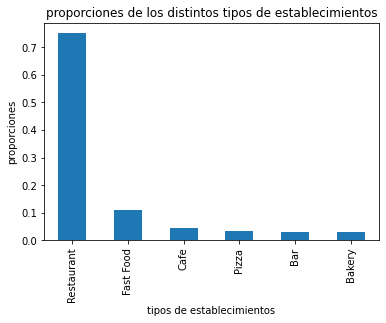

In [13]:
keys = ['Restaurant', 'Fast Food', 'Bar', 'Cafe', 'Pizza', 'Bakery']
vals = [restaurant, fast_food, bar, cafe, pizza, bakery]
rest_data['object_type'].value_counts(normalize=True).plot(kind='bar')
plt.title('proporciones de los distintos tipos de establecimientos')
plt.xlabel('tipos de establecimientos')
plt.ylabel('proporciones')
plt.show()

La proporción del número de asientos de un restaurante es mayor que al de los otros tipos de establecimientos.

###  proporciones de los establecimientos que pertenecen a una cadena y de los que no

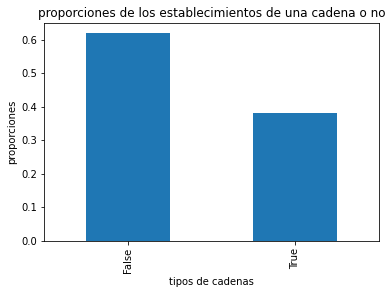

In [14]:
false = (rest_data[rest_data['chain'] == False]['number'].sum()) / total_segments
true = (rest_data[rest_data['chain'] == True]['number'].sum()) / total_segments
keys = ['False', 'True']
vals = [false, true]
rest_data['chain'].value_counts(normalize=True).plot(kind='bar')
plt.title('proporciones de los establecimientos de una cadena o no')
plt.xlabel('tipos de cadenas')
plt.ylabel('proporciones')
plt.show()

Los establecimientos que nos una cadena poseen una proporción mayor en el número de asientos que los establecimientos que sí son cadena.

### ¿Qué tipo de establecimiento es habitualmente una cadena?

In [15]:
(rest_data
     .assign(chain_num=rest_data['chain'].astype(int))
     .pivot_table(index='object_type', 
                  values='chain_num', 
                  aggfunc=['sum', 'count', 'mean']))

,sum,count,mean
,chain_num,chain_num,chain_num
object_type,,,
Bakery,283,283,1.000000
Bar,77,292,0.263699
Cafe,266,435,0.611494
Fast Food,605,1066,0.567542
Pizza,153,319,0.479624
Restaurant,2292,7253,0.316007


El tipo de establecimiento que habitualmente es una cadena, es la pastelería, ya que no tiene ningún establecimiento que no sea una cadena.

### ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number', ylabel='Density'>

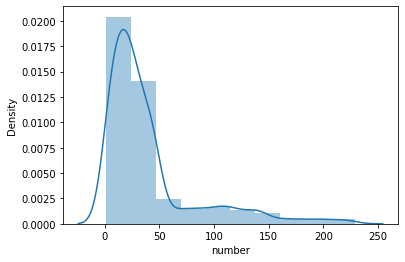

In [16]:
chains = rest_data.query('chain == True')
sns.distplot(chains['number'], bins=10)

In [17]:
chains['object_name'].count()


3676

In [18]:
chains['number'].sum()

145916

In [19]:
no_chains = rest_data.query('chain == False')
no_chains['object_name'].count()

5972

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number', ylabel='Density'>

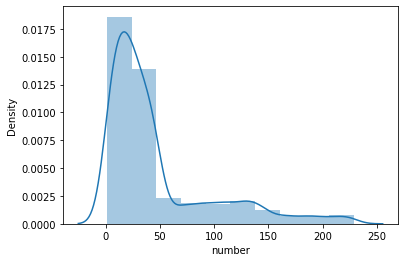

In [20]:
sns.distplot(no_chains['number'], bins=10)

Lo que caracteriza a las cadenas, son pocos establecimientos, pero muchas sillas.

### De promedio¿qué tipo de restaurante tiene el mayor número de asientos?

In [21]:
rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False)

object_type
Restaurant    48.048807
Bar           44.767123
Fast Food     31.837711
Pizza         28.545455
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64

<AxesSubplot:xlabel='object_type', ylabel='number'>

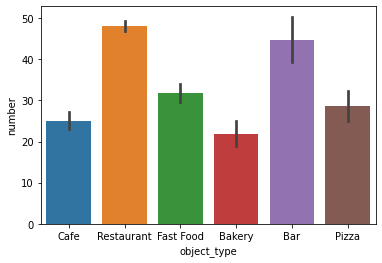

In [22]:
sns.barplot(x='object_type', y='number', data=rest_data, estimator=mean)

El restaurante es el tipo que más número de asientos tiene en promedio.


### Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [34]:
rest_data['street_name'] = rest_data['address'].str.split().str[1:4].str.join(' ')
rest_data['street_name'] = rest_data['street_name'].str.replace(r'^(?:[W|N|S|E] )|(?:\s[#|W|N|S|E])$', '', regex=True) 
rest_data.head(10)

/tmp/ipykernel_152/2099261710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_data['street_name'] = rest_data['address'].str.split().str[1:4].str.join(' ')
/tmp/ipykernel_152/2099261710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_data['street_name'] = rest_data['street_name'].str.replace(r'^(?:[W|N|S|E] )|(?:\s[#|W|N|S|E])$', '', regex=True)


,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,EAGLE ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,WORLD WAY
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,6TH ST
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,SAN FERNANDO
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,CAHUENGA BLVD


### Traza un gráfico de las diez mejores calles por número de restaurantes

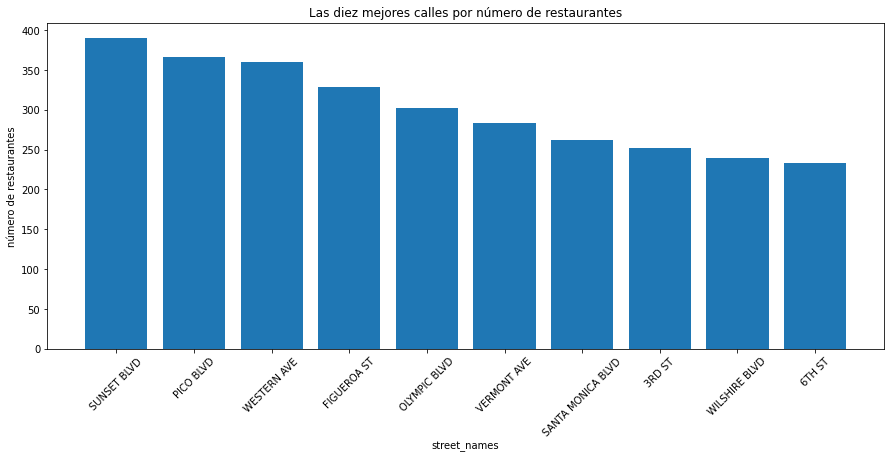

In [24]:
top_streets = rest_data.groupby('street_name')['object_type'].count().sort_values(ascending=False).head(10).reset_index()
top_streets.columns = ['street_name', 'restaurants']
plt.figure(figsize=(15, 6))
plt.bar(top_streets['street_name'], top_streets['restaurants'])
plt.xlabel('street_names')
plt.ylabel('número de restaurantes')
plt.title('Las diez mejores calles por número de restaurantes')
plt.xticks(rotation=45)
plt.show()

La calle SUNSET BLVD, es la que más restaurantes posee, siendo la mejor de las 10. 

### Encuentra el número de calles que solo tienen un restaurante

In [28]:
few_rests = rest_data.groupby('street_name')['object_type'].count().reset_index()
few_rests.columns = ['street_name', 'restaurants']
only_one = few_rests.query('restaurants == 1')
only_one.groupby('street_name').count()

,restaurants
street_name,
1/2 3RD ST,1
1/2 7TH ST,1
1/2 CITY TERRACE,1
1/2 COLORADO BLVD,1
1/2 E 2ND,1
...,...
ZOO DR,1
hollywood BLVD,1
pico BLVD,1


Alrededor de 445 calles tienen solo un restaurante.

### Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

<AxesSubplot:xlabel='restaurants', ylabel='number'>

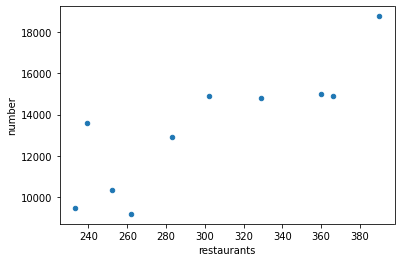

In [29]:
seats = rest_data.groupby('street_name')['number'].sum().reset_index()
distr = top_streets.merge(seats, on='street_name', how='left')
distr.plot(x='restaurants', y='number', kind='scatter')

In [30]:
distr

,street_name,restaurants,number
0,SUNSET BLVD,390,18787
1,PICO BLVD,366,14920
2,WESTERN AVE,360,15012
3,FIGUEROA ST,329,14822
4,OLYMPIC BLVD,302,14924
5,VERMONT AVE,283,12919
6,SANTA MONICA BLVD,262,9164
7,3RD ST,252,10351
8,WILSHIRE BLVD,239,13568
9,6TH ST,233,9442


Para las calles con muchos restaurantes, el número de asientos se distribuye más entre las cantidades de 10000 a 15000 asientos, entre 250 a 370 restaurantes.

## Conclusión general

Después de analizar el dataset se pudo concluir lo siguiente:


1. Primero, se decidió analizar la información del datset de los restaurantes, para ver los tipos de columnas, la cantidad de datos, los nombres, etc.
2. Se encontraron valores ausentes en la columna chain; solo 3; como fueron pocos, se decidió eliminarlos, ya que no iban a afectar los datos.
3. No se encontraron datos duplicados.
4. Se tuvo que añadir una nueva columna 'street_name' para los nombres de las calles, para tener un mejor vistazo a los nombres de las calles.

Asimismo, se comprobó lo siguiente:

1. El tipo de establecimiento con la proporción del número de sillas más alta, es del tipo restaurante, así como el promedio.
2. Hay más establecimientos que no son cadenas.
3. Asimismo, es el tipo restaurante donde hay más establecimientos donde no son cadenas y son cadenas, esto se debe a que este tipo es el de mayor cantidad; sin embargo, el tipo pastelería es el que a menudo es cadena.
4. Por último, La calle con más establecimientos, es la calle  SUNSET BLVD, además, es la calle con la mayor cantidad de sillas de las 10 calles con más establecimientos.

Para concluir, El tipo de establecimiento en donde más se debería enfocar, es del tipo restaurante, la calle de Los Ángeles con el mayor potencial para realizar este proyecto, es la calle  SUNSET BLVD; debido a las proporciones que tiene en el número de sillas, y por la cantidad de establecimientos que posee.


Presentation: <https://drive.google.com/file/d/1mhGD9ISv6RZh8K_IBvIndoJaRLWyXkwD/view?usp=share_link>